**Day 5 Action Item: Sarcasm Detection**

In [203]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json


In [204]:
#Reading in data
data = pd.read_json("/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json", lines = True)
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [205]:
data['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer as tfv

vectorizer=tfv(max_features=1000, use_idf=False)

x = vectorizer.fit_transform(data['headline'].values).toarray()

y = data['is_sarcastic'].values

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3, random_state = 42)

In [207]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation='softmax', input_shape=(1000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 32)                32032     
_________________________________________________________________
dense_114 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_115 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_116 (Dense)            (None, 1)                 9         
Total params: 32,705
Trainable params: 32,705
Non-trainable params: 0
_________________________________________________________________


In [208]:
history = model.fit(x_train, y_train, epochs=300, batch_size=1024, verbose=1)

Epoch 1/300
20/20 [==============================] - 1s 6ms/step - loss: 0.6919 - accuracy: 0.5253
Epoch 2/300
20/20 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5251
Epoch 3/300
20/20 [==============================] - 0s 6ms/step - loss: 0.6918 - accuracy: 0.5252
Epoch 4/300
20/20 [==============================] - 0s 6ms/step - loss: 0.6920 - accuracy: 0.5220
Epoch 5/300
20/20 [==============================] - 0s 6ms/step - loss: 0.6908 - accuracy: 0.5310
Epoch 6/300
20/20 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.5212
Epoch 7/300
20/20 [==============================] - 0s 6ms/step - loss: 0.6905 - accuracy: 0.5216
Epoch 8/300
20/20 [==============================] - 0s 6ms/step - loss: 0.6887 - accuracy: 0.5238
Epoch 9/300
20/20 [==============================] - 0s 6ms/step - loss: 0.6855 - accuracy: 0.5263
Epoch 10/300
20/20 [==============================] - 0s 6ms/step - loss: 0.6810 - accuracy: 0.5207
Epoch 11/

20/20 [==============================] - 0s 7ms/step - loss: 0.3768 - accuracy: 0.8556
Epoch 84/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3821 - accuracy: 0.8544
Epoch 85/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3731 - accuracy: 0.8584
Epoch 86/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3699 - accuracy: 0.8616
Epoch 87/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3746 - accuracy: 0.8587
Epoch 88/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3777 - accuracy: 0.8563
Epoch 89/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3798 - accuracy: 0.8552
Epoch 90/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3723 - accuracy: 0.8575
Epoch 91/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3753 - accuracy: 0.8571
Epoch 92/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3788 - accuracy: 0.8540
Epoch 93/300


20/20 [==============================] - 0s 6ms/step - loss: 0.3570 - accuracy: 0.8676
Epoch 165/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3529 - accuracy: 0.8686
Epoch 166/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3540 - accuracy: 0.8684
Epoch 167/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3530 - accuracy: 0.8694
Epoch 168/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3494 - accuracy: 0.8710
Epoch 169/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3540 - accuracy: 0.8677
Epoch 170/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3508 - accuracy: 0.8700
Epoch 171/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3513 - accuracy: 0.8683
Epoch 172/300
20/20 [==============================] - ETA: 0s - loss: 0.3464 - accuracy: 0.87 - 0s 6ms/step - loss: 0.3469 - accuracy: 0.8718
Epoch 173/300
20/20 [==============================] - 0s 6ms/s

20/20 [==============================] - 0s 6ms/step - loss: 0.3144 - accuracy: 0.8911
Epoch 245/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3130 - accuracy: 0.8906
Epoch 246/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3064 - accuracy: 0.8956
Epoch 247/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3083 - accuracy: 0.8931
Epoch 248/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3056 - accuracy: 0.8946
Epoch 249/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3041 - accuracy: 0.8985
Epoch 250/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3072 - accuracy: 0.8936
Epoch 251/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3099 - accuracy: 0.8950
Epoch 252/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3069 - accuracy: 0.8957
Epoch 253/300
20/20 [==============================] - 0s 6ms/step - loss: 0.3048 - accuracy: 0.8969
Epoc

In [209]:
model.evaluate(x_test, y_test, verbose=1)

269/269 [==============================] - 0s 1ms/step - loss: 0.5262 - accuracy: 0.7888


[0.5261500477790833, 0.7888423204421997]

KeyError: 'val_accuracy'

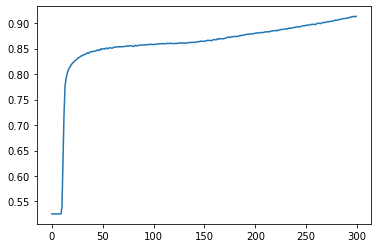

In [211]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")